# Plot models in arxiv

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import corner
from chainconsumer import ChainConsumer
import p1d_arxiv

### Specify suite of simulations to use and read metadata

In [2]:
# option to store only a fraction of the redshifts, to make lighter emulators
undersample_z=1
basedir='../sim_suites/emulator_256_15072019/'
skewers_label='Ns256_wM0.05'
arxiv=p1d_arxiv.ArxivP1D(basedir=basedir,skewers_label=skewers_label,undersample_z=undersample_z,verbose=True)

latin hyper-cube data {'param_space': {'Delta2_star': {'ip': 0, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 1, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'heat_amp': {'ip': 2, 'min_val': 0.3, 'max_val': 3.0, 'latex': '$H_A$'}, 'heat_slo': {'ip': 3, 'min_val': -1.5, 'max_val': 1.5, 'latex': '$H_S$'}, 'z_rei': {'ip': 4, 'min_val': 5.5, 'max_val': 16.0, 'latex': '$z_r$'}}, 'nsamples': 50, 'samples': {'0': [0.392, -2.319, 2.757, -0.4500000000000002, 11.905000000000001], '1': [0.268, -2.327, 1.0830000000000002, -1.41, 6.025], '2': [0.276, -2.311, 1.191, -0.09000000000000008, 5.605], '3': [0.376, -2.291, 0.813, -1.23, 9.805], '4': [0.3, -2.289, 2.703, -1.35, 15.685], '5': [0.38, -2.297, 2.487, 0.5700000000000003, 13.375], '6': [0.324, -2.303, 1.5150000000000001, -0.20999999999999996, 14.005], '7': [0.364, -2.313, 2.649, 1.3499999999999996, 11.275], '8': [0.29200000000000004, -2

In [3]:
Nmodels=len(arxiv.data)
print('# models =',Nmodels)

# models = 6750


In [4]:
min(arxiv.z)

2.0

In [5]:
vary_running=False
vary_growth=False
#labels=[r'$\Delta_p^2$',r'$n_p$',r'$\alpha_p$',r'$f_p$',r'$\bar F$',r'$\sigma_T$ [Mpc]',r'$\gamma$',r'$k_F$ [1/Mpc]']
labels=[r'$\Delta_p^2$',r'$n_p$',r'$\bar F$',r'$\sigma_T$ [Mpc]',r'$\gamma$',r'$k_F$ [1/Mpc]']
if vary_running:
    labels.append(r'$\alpha_p$')
if vary_growth:
    labels.append(r'$f_p$')
Npar=len(labels)
database=np.empty([Nmodels,Npar])
database[:,0]=arxiv.Delta2_p
database[:,1]=arxiv.n_p
database[:,2]=arxiv.mF
database[:,3]=arxiv.sigT_Mpc
database[:,4]=arxiv.gamma
database[:,5]=arxiv.kF_Mpc
if vary_running:
    database[:,6]=arxiv.alpha_p
if vary_growth:
    database[:,-1]=arxiv.f_p

In [6]:
for i in range(Npar):
    print(i,labels[i],min(database[:,i]),max(database[:,i]))

0 $\Delta_p^2$ 0.162294591674 0.783401879426
1 $n_p$ -2.34900040311 -2.25099984899
2 $\bar F$ 0.098511229855 0.948870560513
3 $\sigma_T$ [Mpc] 0.0624486751728 0.225984336887
4 $\gamma$ 0.547582137725 2.62143856348
5 $k_F$ [1/Mpc] 8.45202939796 39.0124166635


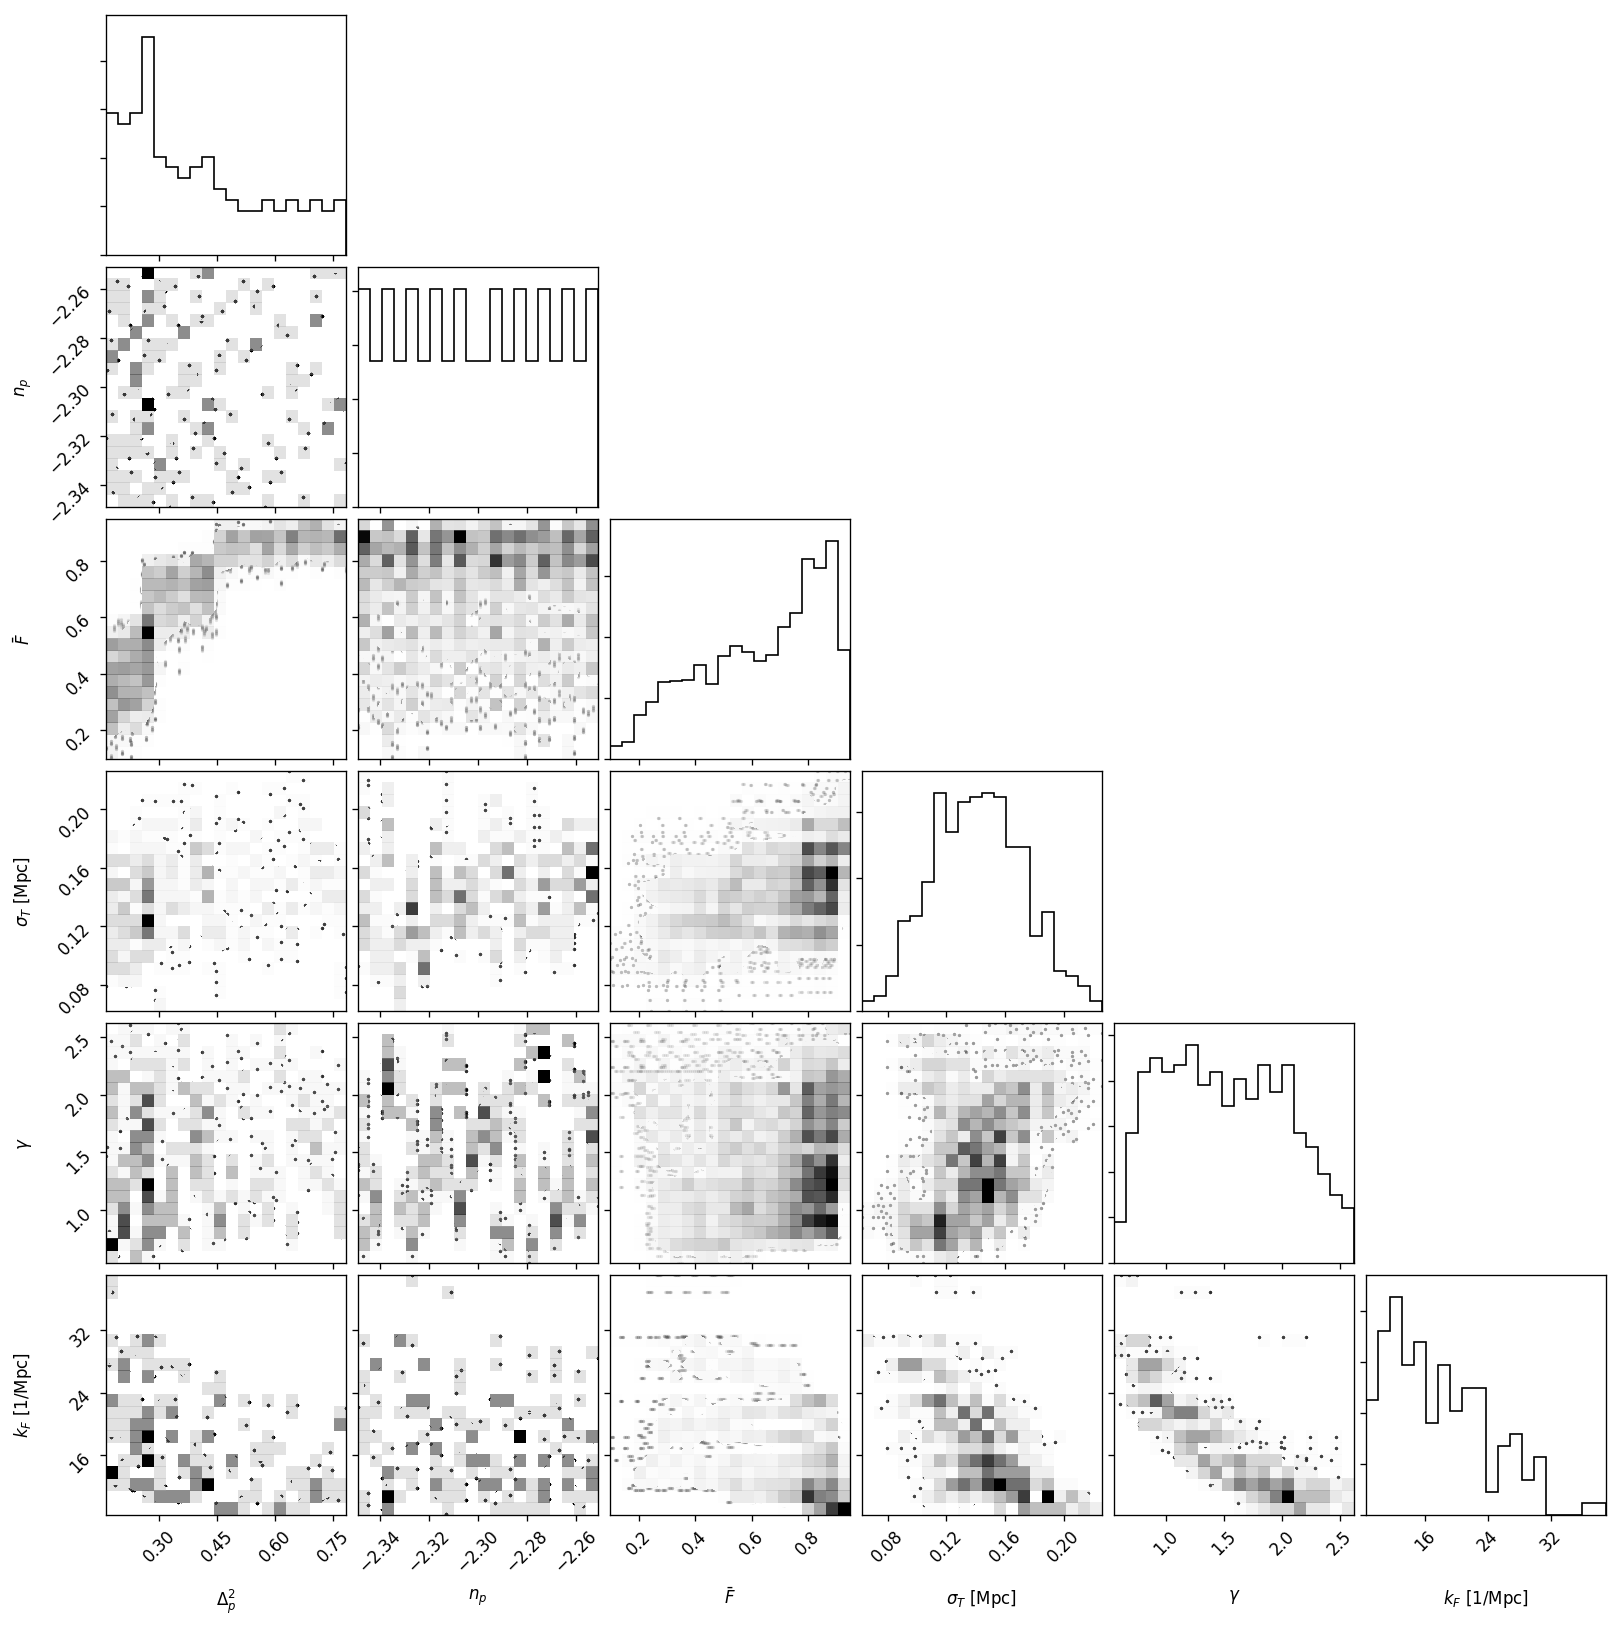

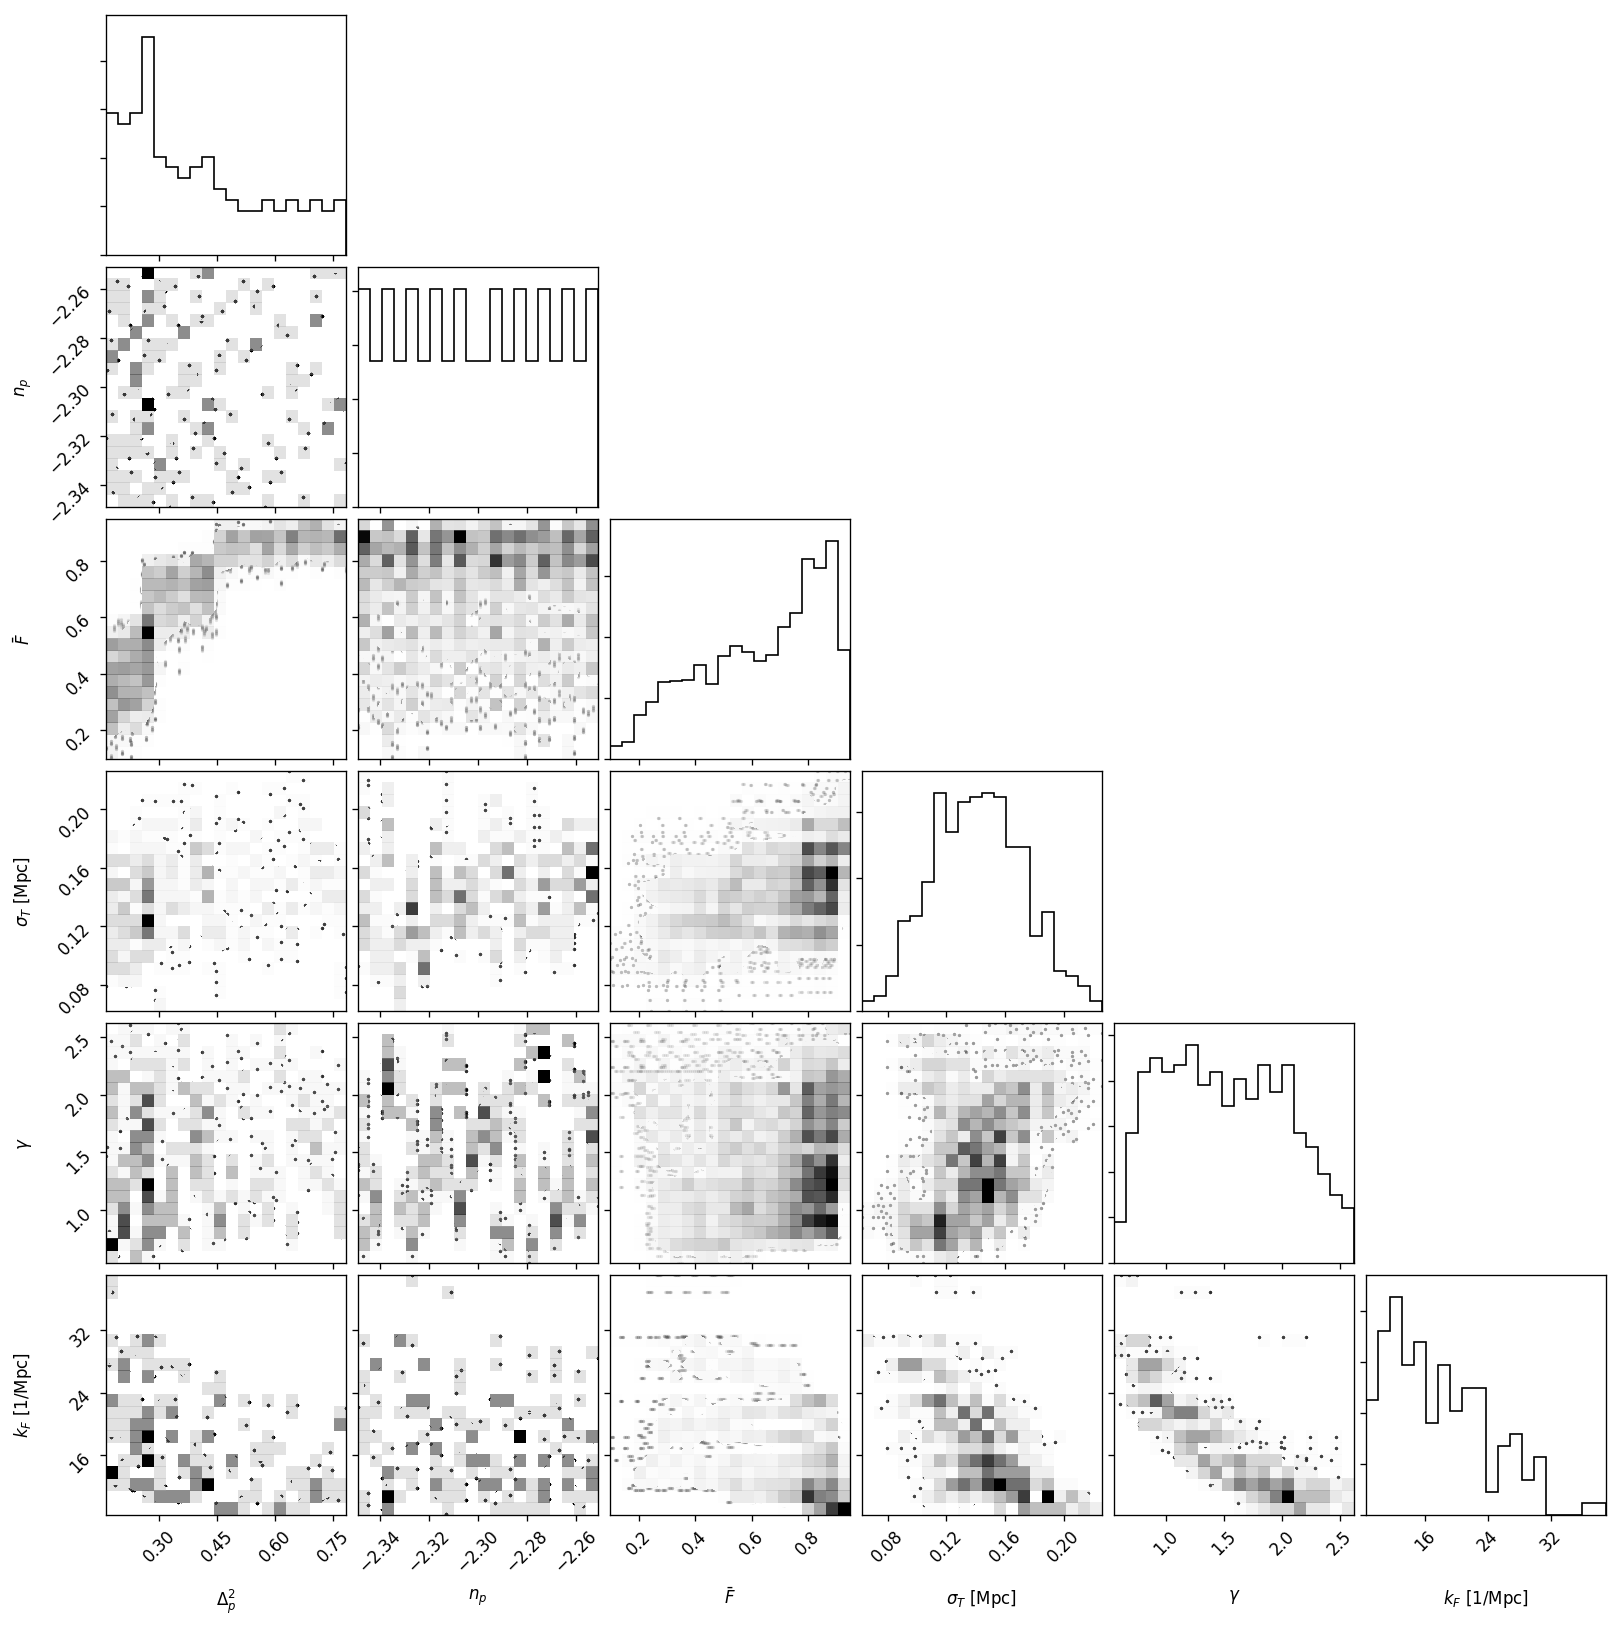

In [7]:
corner.corner(database, labels=labels,plot_contours=False)